In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.DataFrame({
    'Clientes': ['Cliente 2', 'Cliente 5', 'Cliente 1', 'Cliente 1', 'Cliente 7', 'Cliente 5', 'Cliente 7', 'Cliente 2', 'Cliente 6', 'Cliente 7'],
    'Valor_compra': [378, 475, 285, 181, 177, 391, 115, 156, 46, 329],
    'Qtde_produtos': [10, 18, 10, 4, 20, 2, 16, 12, 19, 11],
    'Forma_pag': [1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
})

In [3]:
# Separando as caracteristicas e o rótulo
X = data[['Valor_compra', 'Qtde_produtos']]  # Variáveis independentes
y = data['Forma_pag']  # Variável dependente (rótulo)

Separando os dados em teste e treino

In [4]:
# Dividindo os dados em conjunto de treinamento e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Treinando o modelo SVM

In [5]:
# Criando o modelo SVM
model = SVC(kernel='linear')  # Usando o kernel linear para SVM
model.fit(X_train, y_train)  # Treinando o modelo

SVC(kernel='linear')

In [6]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

In [7]:
# Avaliando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



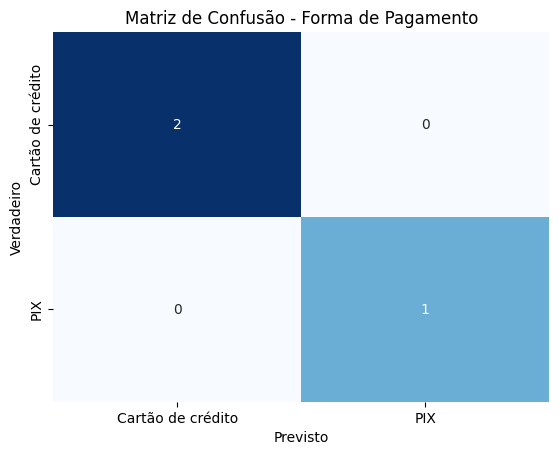

In [8]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Cartão de crédito', 'PIX'], 
            yticklabels=['Cartão de crédito', 'PIX'])
plt.title('Matriz de Confusão - Forma de Pagamento')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

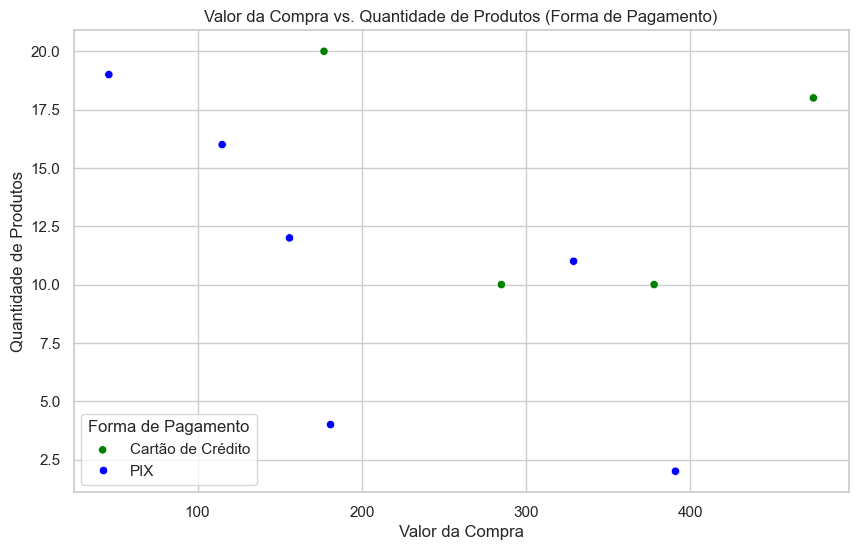

In [9]:
# Scatterplot
sns.set(style="whitegrid")
palette = {1: "green", 0: "blue"}  # 1 = PIX (verde), 0 = Cartão de crédito (azul)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valor_compra', y='Qtde_produtos', hue='Forma_pag', data=data, palette=palette)

# Personalizando o gráfico
plt.title('Valor da Compra vs. Quantidade de Produtos (Forma de Pagamento)')
plt.xlabel('Valor da Compra')
plt.ylabel('Quantidade de Produtos')
plt.legend(title='Forma de Pagamento', labels=['Cartão de Crédito', 'PIX'])
plt.show()